In [60]:
import json
import time
import pandas as pd
from os.path import expanduser
import sys
import os
import numpy as np
import glob

#os.chdir('pysd2cat')
#!{sys.executable} setup.py develop --user --uninstall
#!{sys.executable} setup.py develop --user 
#os.chdir(os.pardir)

from pysd2cat.analysis.correctness import compute_correctness_all, compute_correctness_harness_test, compute_correctness_noharness_test
from pysd2cat.data import pipeline 
from pysd2cat.analysis.live_dead_analysis import add_live_dead_test_harness

%load_ext autoreload
%autoreload 2



running develop
Removing /home/jupyter/tacc-work/jupyter_packages/lib/python3.6/site-packages/pysd2cat.egg-link (link to src)
Removing pysd2cat 0.1 from easy-install.pth file
running develop
running egg_info
writing src/pysd2cat.egg-info/PKG-INFO
writing dependency_links to src/pysd2cat.egg-info/dependency_links.txt
writing requirements to src/pysd2cat.egg-info/requires.txt
writing top-level names to src/pysd2cat.egg-info/top_level.txt
reading manifest file 'src/pysd2cat.egg-info/SOURCES.txt'
writing manifest file 'src/pysd2cat.egg-info/SOURCES.txt'
running build_ext
Creating /home/jupyter/tacc-work/jupyter_packages/lib/python3.6/site-packages/pysd2cat.egg-link (link to src)
Adding pysd2cat 0.1 to easy-install.pth file

Installed /home/jupyter/tacc-work/sd2nb/pysd2cat/src
Processing dependencies for pysd2cat==0.1
Searching for FlowCytometryTools==0.5.0
Best match: FlowCytometryTools 0.5.0
Adding FlowCytometryTools 0.5.0 to easy-install.pth file

Using /home/jupyter/tacc-work/jupyter_pa

In [40]:
pipeline.get_experiment_ids()

['experiment.transcriptic.r1bbqkufj7wpz',
 'experiment.transcriptic.r1c5va9wyf3mx_r1c63bjzu5ruy',
 'experiment.transcriptic.r1c84xy5frkf3_r1c8ejr9kezva',
 'experiment.transcriptic.r1ceuab227w5q_r1cf3jgv8pegg',
 'experiment.transcriptic.r1cckyh56hjqj_r1ccpyjef2vca',
 'experiment.transcriptic.r1bd6ma3q8btb',
 'experiment.transcriptic.r1bsmggea748b_r1bsun4yb67e7',
 'experiment.transcriptic.r1ce3pm76spw4_r1ceas4zgsdt5',
 'experiment.transcriptic.r1bgtnn6nxy85',
 'experiment.transcriptic.r1bsqh78n5jeq_r1bsxfcwtsbmt',
 'experiment.transcriptic.r1cctw7qh3777_r1ccwxr4t3wb6',
 'experiment.transcriptic.r1ch4db47m3f2_r1ch7x667aevf',
 'experiment.transcriptic.r1cckyeq9r358_r1ccqgmy5ffcd',
 'experiment.transcriptic.r1ccqfas8urfk_r1cctk2a3wbk5',
 'experiment.transcriptic.r1bcfncn8xeys',
 'experiment.transcriptic.r1bcc65suuqrj',
 'experiment.transcriptic.r1cbut6a79n9t_r1cc34mkuvzeh',
 'experiment.transcriptic.r1ch4dgexae9n_r1ch7tk8h4kye',
 'experiment.transcriptic.r1c7cpt3djxuj_r1c7fex29q6t2',
 'expe

In [54]:
## Get the data
#ex_id = 'experiment.transcriptic.r1c5va879uaex_r1c639xp952g4'
ex_id = 'experiment.transcriptic.r1c5vad8u7ve2_r1c66q7cru28u'
samples = pipeline.get_experiment_samples(ex_id, 'FCS')
sample_records = pipeline.get_metadata_dataframe(samples).drop_duplicates()
df = pipeline.get_xplan_data_and_metadata_df(sample_records, '', max_records=30000)
df = add_live_dead_test_harness(df)


Getting xplan dataframe for experiment...


/home/jupyter/tacc-work/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:08:47
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.75 seconds
Testing time was: 0.42 seconds
Prediction time of untested data was: 50.54991054534912

          Run ID        Date      Time                    Model Name Model Author  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6dRW11Yzdg5NG  2019-05-29  21:08:47  random_forest_classification  Hamed        0.993     0.991              0.999      1.0                0.995     0.994      0.996   33351            8338            Random Forest: n

In [86]:
## Calculate different measures on data
#correctness_df = compute_correctness_all(df, high_control='NOR 00 Control')
correctness_df = compute_correctness_harness_test(df, high_control='NOR 00 Control')

            FSC_A      SSC_A    BL1_A     RL1_A     FSC_H      SSC_H   BL1_H    RL1_H   FSC_W   SSC_W  BL1_W  RL1_W  class_label
96464   1048575.0  1048575.0  50709.0  497612.0  143548.0  1048575.0  788.0   64382.0  1023.0  1023.0  0.0    208.0  0          
96465   100132.0   808091.0   74.0     15030.0   43464.0   419670.0   78.0    12429.0  67.0    146.0   0.0    15.0   0          
96466   32897.0    163066.0  -4.0      25.0      29775.0   152832.0   64.0    42.0     29.0    47.0    0.0    0.0    0          
96467   53908.0    223101.0   60.0     98.0      41272.0   175634.0   96.0    69.0     39.0    59.0    0.0    0.0    0          
96468   62642.0    438119.0   19.0     4.0       50665.0   382702.0   84.0    130.0    40.0    90.0    0.0    0.0    0          
96469   60639.0    287875.0   32.0     64.0      42749.0   206259.0   90.0    71.0     43.0    79.0    0.0    0.0    0          
96470   41567.0    180704.0  -1.0      5.0       39391.0   174316.0   44.0    73.0     31.0    47

Starting Classification training...
Training time was: 7.06 seconds
Testing time was: 0.95 seconds
Prediction time of untested data was: 58.60746121406555

          Run ID        Date      Time                    Model Name Model Author  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QMlBapgdQkgw7  2019-05-31  13:16:31  random_forest_classification  Hamed        0.976     0.975              0.996      0.996              0.973     0.979      0.968   43448            10863           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                circuit output prediction  True       12            

/home/jupyter/tacc-work/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyter/tacc-work/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [87]:
#df['strain_name'].value_counts()
correctness_df['mean_correct_classifier'].value_counts()
#np.mean(correctness_df.apply(lambda x: np.abs(x['mean_correct_classifier']- x['mean_correct_classifier_live']), axis=1))

1.000000    47
0.000000    40
0.220033    1 
Name: mean_correct_classifier, dtype: int64

Text(0, 0.5, 'threshold_live')

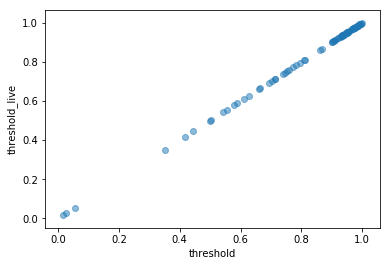

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt

ax = plt.axes()
ax.scatter(correctness_df['mean_correct_threshold'], correctness_df['mean_correct_threshold_live'], alpha=0.5)
ax.set_xlabel('threshold')
ax.set_ylabel('threshold_live')



Text(0, 0.5, 'classifier_live')

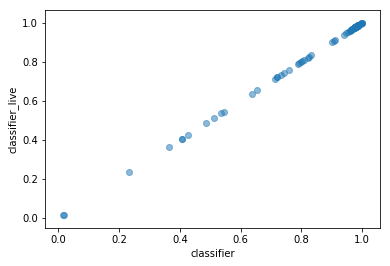

In [73]:
ax = plt.axes()
ax.scatter(correctness_df['mean_correct_classifier'], correctness_df['mean_correct_classifier_live'], alpha=0.5)
ax.set_xlabel('classifier')
ax.set_ylabel('classifier_live')



Text(0, 0.5, 'classifier_live')

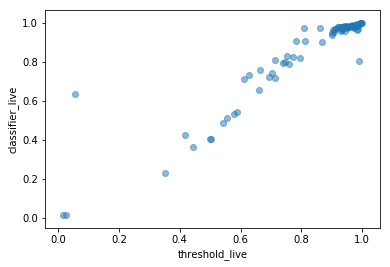

In [74]:
ax = plt.axes()
ax.scatter(correctness_df['mean_correct_threshold_live'], correctness_df['mean_correct_classifier_live'], alpha=0.5)
ax.set_xlabel('threshold_live')
ax.set_ylabel('classifier_live')



Text(0, 0.5, 'classifier')

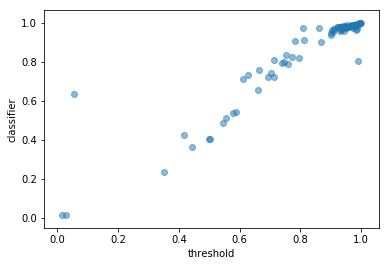

In [75]:
ax = plt.axes()
ax.scatter(correctness_df['mean_correct_threshold'], correctness_df['mean_correct_classifier'], alpha=0.5)
ax.set_xlabel('threshold')
ax.set_ylabel('classifier')

